# IPC per benchmark
Below, you can reproduce the average IPC per benchmark in bar plot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv("ipc.csv")
df.head()

,suite,benchmark,chip count,160GB/s,300GB/s,600GB/s,900GB/s,1200GB/s,1400GB/s,1800GB/s,2048GB/s
0,SDK,conjugate-gradient,4,523.83,904.77,1411.53,1775.17,1974.49,2043.46,2068.95,2207.36
1,SDK,conjugate-gradient,8,539.09,958.92,1690.75,2208.06,2528.09,2744.18,2866.38,2991.21
2,SDK,conjugate-gradient,16,534.74,954.95,1694.85,2250.25,2684.58,3045.71,3292.87,3430.96
3,SDK,fdtd3d,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SDK,fdtd3d,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


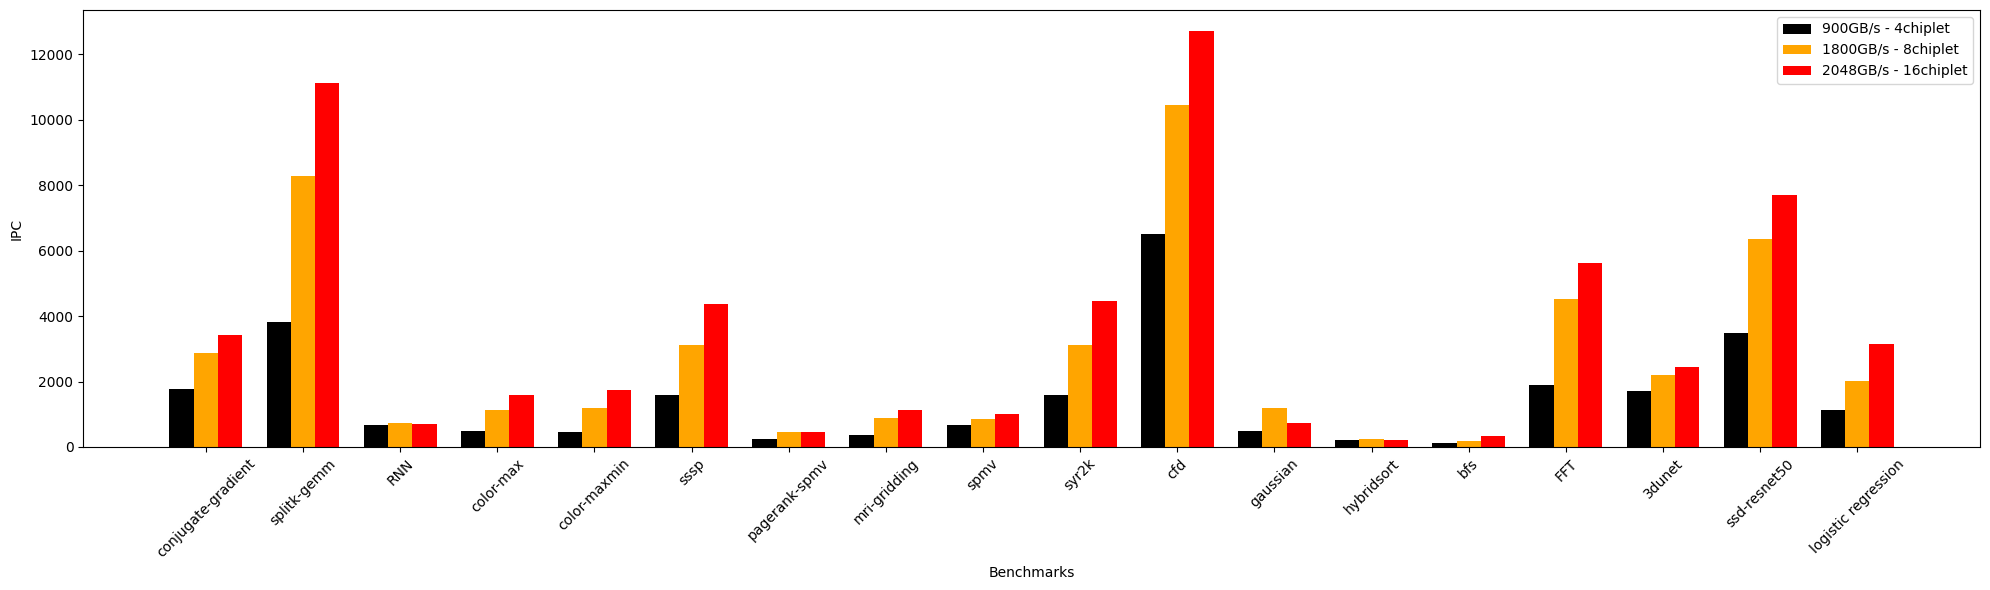

In [32]:
clean_df = df.dropna(subset=['900GB/s', '1800GB/s', '2048GB/s'])

benchmarks = clean_df['benchmark'].unique()
x = np.arange(len(benchmarks))
width = 0.25

plt.figure(figsize=(20, 6))
plt.bar(x - width, clean_df[clean_df['chip count'] == 4]['900GB/s'], width, label='900GB/s - 4chiplet', color="black")
plt.bar(x,         clean_df[clean_df['chip count'] == 8]['1800GB/s'], width, label='1800GB/s - 8chiplet', color="orange")
plt.bar(x + width, clean_df[clean_df['chip count'] == 16]['2048GB/s'], width, label='2048GB/s - 16chiplet', color="red")
plt.xlabel('Benchmarks')
plt.ylabel('IPC')
plt.xticks(x, benchmarks, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
def harmonic_mean(series):
   return len(series) / sum(1/x for x in series)

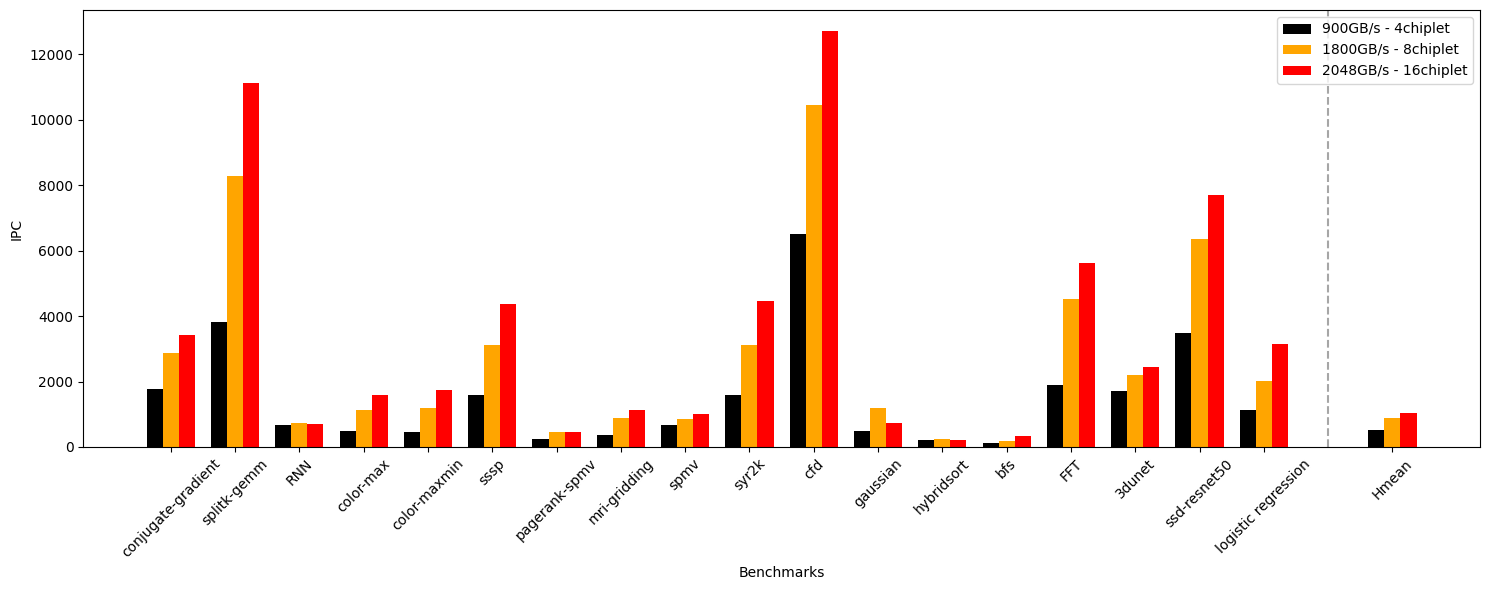

In [57]:
hmeans = {
   '900GB/s': harmonic_mean(clean_df[clean_df['chip count'] == 4]['900GB/s']),
   '1800GB/s': harmonic_mean(clean_df[clean_df['chip count'] == 8]['1800GB/s']),
   '2048GB/s': harmonic_mean(clean_df[clean_df['chip count'] == 16]['2048GB/s'])
}

plt.figure(figsize=(15, 6))
benchmarks = clean_df['benchmark'].unique()
x = np.arange(len(benchmarks) + 1)  # +1 for hmean
width = 0.25
gap = 1

# Plot regular bars
plt.bar(x[:-1] - width, clean_df[clean_df['chip count'] == 4]['900GB/s'], width, label='900GB/s - 4chiplet', color="black")
plt.bar(x[:-1],         clean_df[clean_df['chip count'] == 8]['1800GB/s'], width, label='1800GB/s - 8chiplet', color="orange")
plt.bar(x[:-1] + width, clean_df[clean_df['chip count'] == 16]['2048GB/s'], width, label='2048GB/s - 16chiplet', color="red")

# Plot hmean bars
hmean_x = len(benchmarks) + gap
plt.bar(hmean_x - width, hmeans['900GB/s'], width, color="black")
plt.bar(hmean_x, hmeans['1800GB/s'], width, color="orange")
plt.bar(hmean_x + width, hmeans['2048GB/s'], width, color="red")

# Add vertical line
plt.axvline(x=len(benchmarks) + gap/2 - 0.5, color='gray', linestyle='--', alpha=0.7)

# Labels and formatting
plt.xlabel('Benchmarks')
plt.ylabel('IPC')
x = np.arange(len(benchmarks))
x_with_gap = np.append(x, hmean_x)
bench_labels = list(benchmarks) + ['Hmean']
plt.xticks(x_with_gap, bench_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("results/absolute_average_IPC_with_average.png")

# relative IPC
below code is for measuring every benchmark's relative IPC based on the IPC of 4 chiplet and 160GB/s

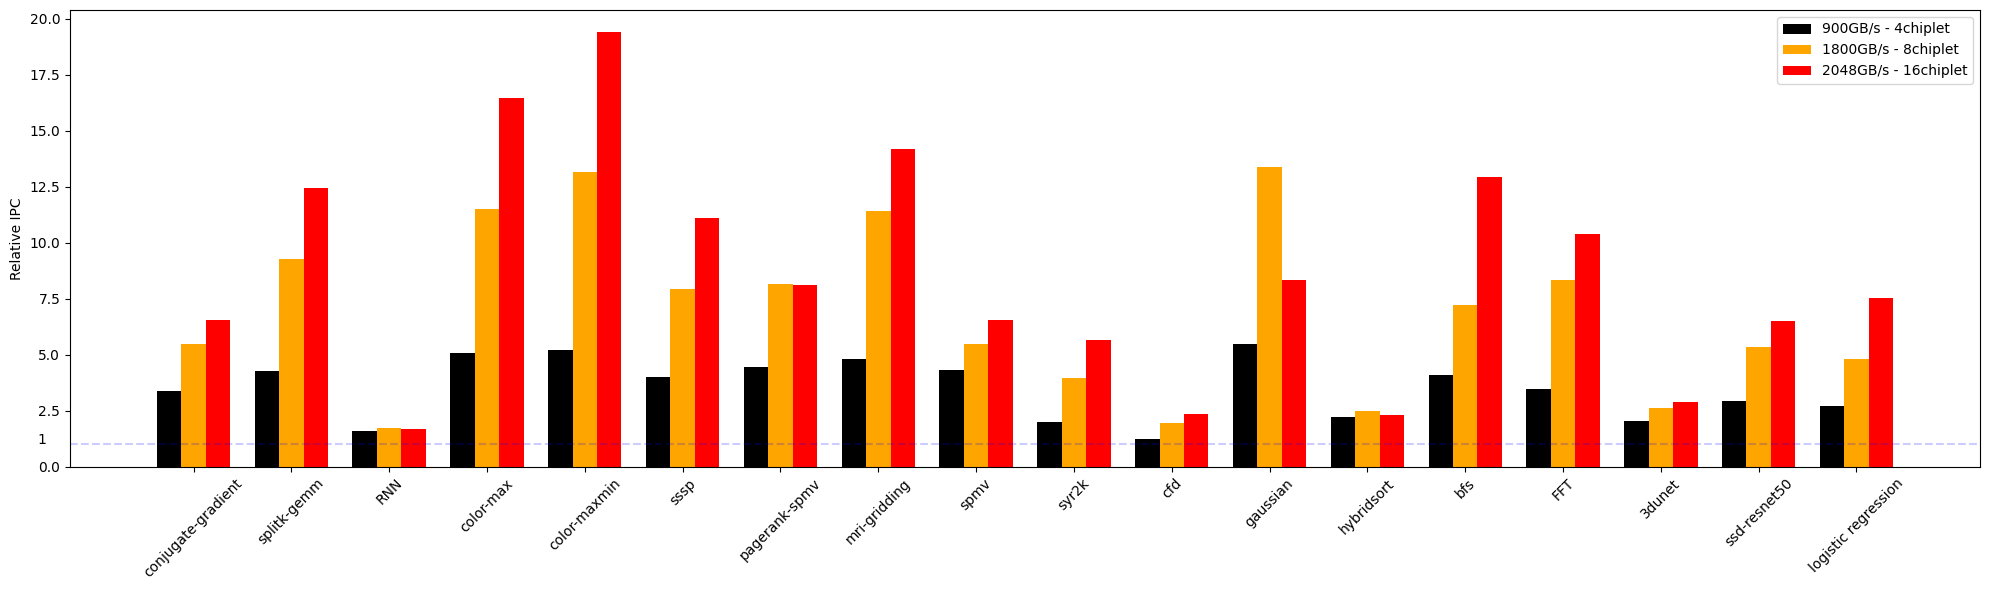

In [80]:
# Calculate baseline IPCs (4 chiplet, 160GB/s) for each benchmark
baseline_ipcs = clean_df[clean_df['chip count'] == 4]['160GB/s']
baseline_dict = dict(zip(clean_df[clean_df['chip count'] == 4]['benchmark'], baseline_ipcs))

# Calculate relative IPCs
rel_df = clean_df.copy()
for bench in baseline_dict:
   bench_mask = rel_df['benchmark'] == bench
   for col in ['900GB/s', '1800GB/s', '2048GB/s']:
       rel_df.loc[bench_mask, col] = rel_df.loc[bench_mask, col] / baseline_dict[bench]

# Calculate harmonic means of relative IPCs
rel_hmeans = {
   '900GB/s': harmonic_mean(rel_df[rel_df['chip count'] == 4]['900GB/s']),
   '1800GB/s': harmonic_mean(rel_df[rel_df['chip count'] == 8]['1800GB/s']),
   '2048GB/s': harmonic_mean(rel_df[rel_df['chip count'] == 16]['2048GB/s'])
}

benchmarks = clean_df['benchmark'].unique()
x = np.arange(len(benchmarks))
width = 0.25

# Plot
plt.figure(figsize=(20, 6))
x = np.arange(len(benchmarks))

# Plot regular bars
plt.bar(x - width, rel_df[rel_df['chip count'] == 4]['900GB/s'], width, label='900GB/s - 4chiplet', color="black")
plt.bar(x, rel_df[rel_df['chip count'] == 8]['1800GB/s'], width, label='1800GB/s - 8chiplet', color="orange")
plt.bar(x + width, rel_df[rel_df['chip count'] == 16]['2048GB/s'], width, label='2048GB/s - 16chiplet', color="red")
plt.axhline(1, color='blue', linestyle='--', alpha=0.2)
# Labels and formatting
plt.ylabel('Relative IPC')
plt.xticks(x, benchmarks, rotation=45)
plt.text(-1.6, 1, "1")
plt.legend()
plt.tight_layout()
plt.savefig("results/relative_IPC.png")

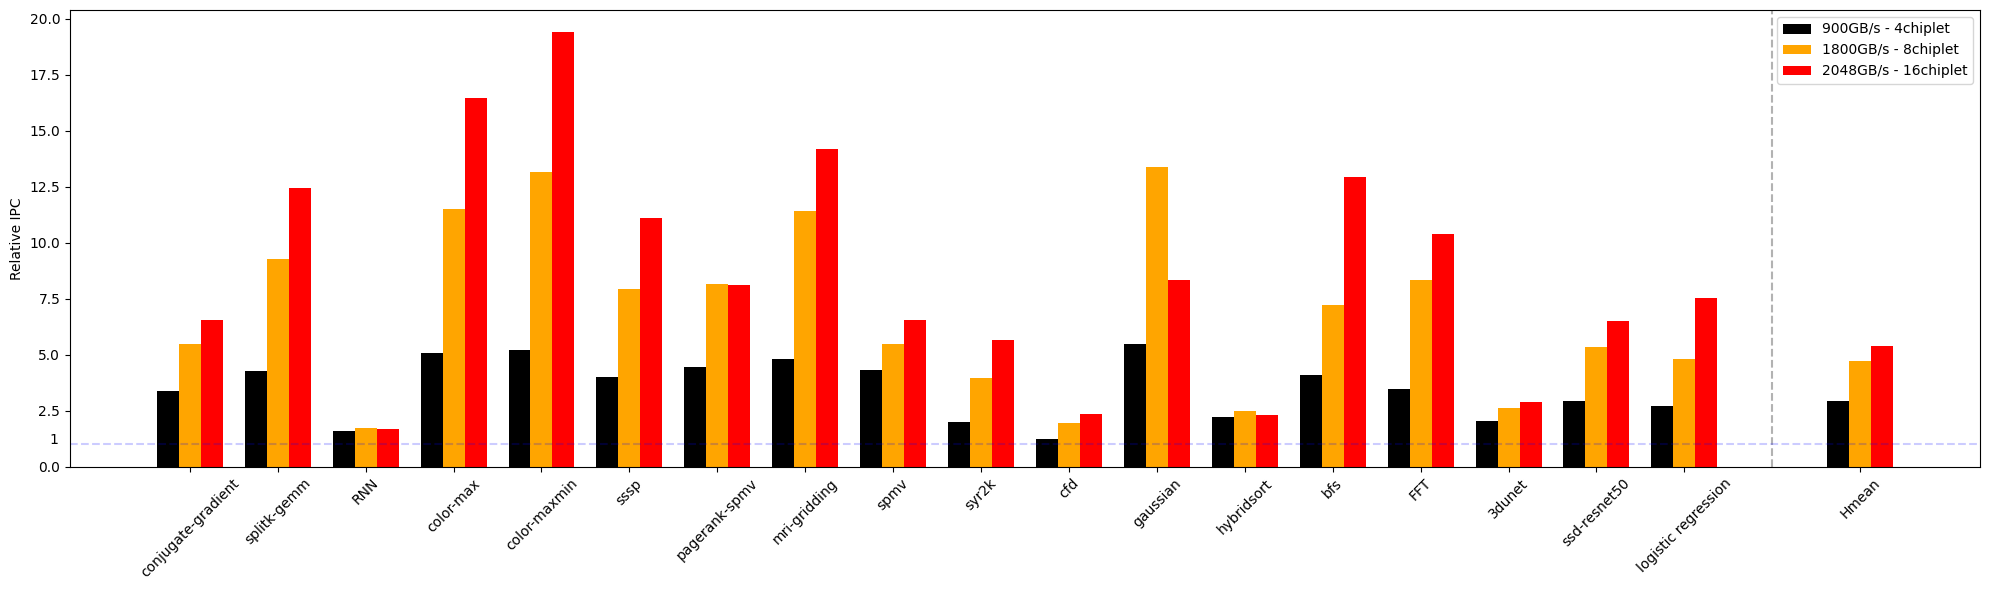

In [77]:
# Calculate baseline IPCs (4 chiplet, 160GB/s) for each benchmark
baseline_ipcs = clean_df[clean_df['chip count'] == 4]['160GB/s']
baseline_dict = dict(zip(clean_df[clean_df['chip count'] == 4]['benchmark'], baseline_ipcs))

# Calculate relative IPCs
rel_df = clean_df.copy()
for bench in baseline_dict:
   bench_mask = rel_df['benchmark'] == bench
   for col in ['900GB/s', '1800GB/s', '2048GB/s']:
       rel_df.loc[bench_mask, col] = rel_df.loc[bench_mask, col] / baseline_dict[bench]

# Calculate harmonic means of relative IPCs
rel_hmeans = {
   '900GB/s': harmonic_mean(rel_df[rel_df['chip count'] == 4]['900GB/s']),
   '1800GB/s': harmonic_mean(rel_df[rel_df['chip count'] == 8]['1800GB/s']),
   '2048GB/s': harmonic_mean(rel_df[rel_df['chip count'] == 16]['2048GB/s'])
}

# Plot
plt.figure(figsize=(20, 6))
x = np.arange(len(benchmarks))
gap = 1

# Plot regular bars
plt.bar(x - width, rel_df[rel_df['chip count'] == 4]['900GB/s'], width, label='900GB/s - 4chiplet', color="black")
plt.bar(x, rel_df[rel_df['chip count'] == 8]['1800GB/s'], width, label='1800GB/s - 8chiplet', color="orange")
plt.bar(x + width, rel_df[rel_df['chip count'] == 16]['2048GB/s'], width, label='2048GB/s - 16chiplet', color="red")

# Plot hmean bars
hmean_x = len(benchmarks) + gap
plt.bar(hmean_x - width, rel_hmeans['900GB/s'], width, color="black")
plt.bar(hmean_x, rel_hmeans['1800GB/s'], width, color="orange")
plt.bar(hmean_x + width, rel_hmeans['2048GB/s'], width, color="red")

# Add vertical line
plt.axvline(x=len(benchmarks) + gap/2 - 0.5, color='gray', linestyle='--', alpha=0.6)
plt.axhline(1, color='blue', linestyle='--', alpha=0.2)

# Labels and formatting
plt.ylabel('Relative IPC')
x_with_gap = np.append(x, hmean_x)
bench_labels = list(benchmarks) + ['Hmean']
plt.xticks(x_with_gap, bench_labels, rotation=45)
plt.text(-1.6, 1, "1")
plt.legend()
plt.tight_layout()
plt.savefig("results/relative_IPC_with_average.png")